In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Generate synthetic data
np.random.seed(42)
n_customers = 200

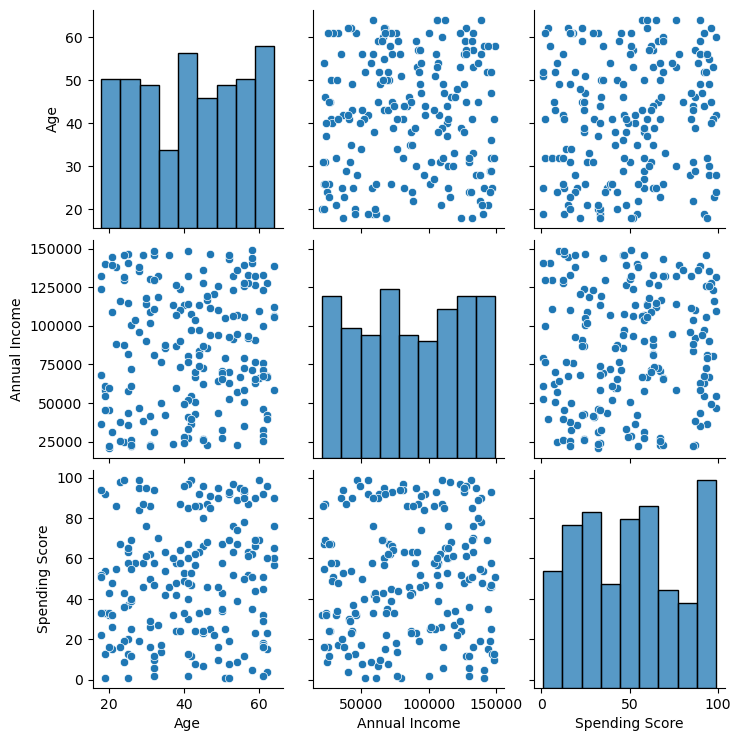

In [5]:
# Age: Randomly generated between 18 and 65
age = np.random.randint(18, 65, size=n_customers)

# Annual Income: Randomly generated between 20k and 150k
income = np.random.randint(20000, 150000, size=n_customers)

# Spending Score: Randomly generated between 1 and 100
spending_score = np.random.randint(1, 100, size=n_customers)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Annual Income': income,
    'Spending Score': spending_score
})

# Visualize the data
sns.pairplot(df)
plt.show()

C:\Users\Saurav Tripathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saurav Tripathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saurav Tripathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saurav Tripathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

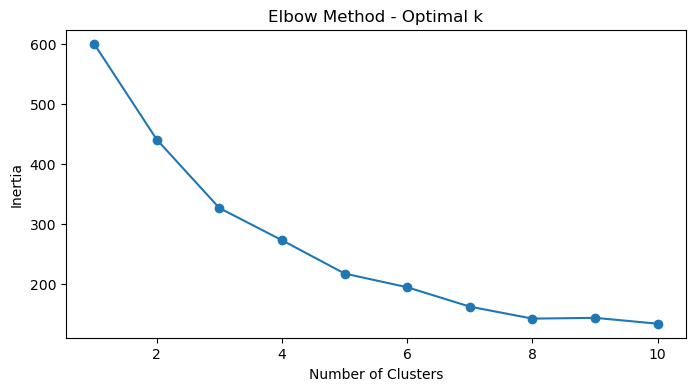

In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Saurav Tripathi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


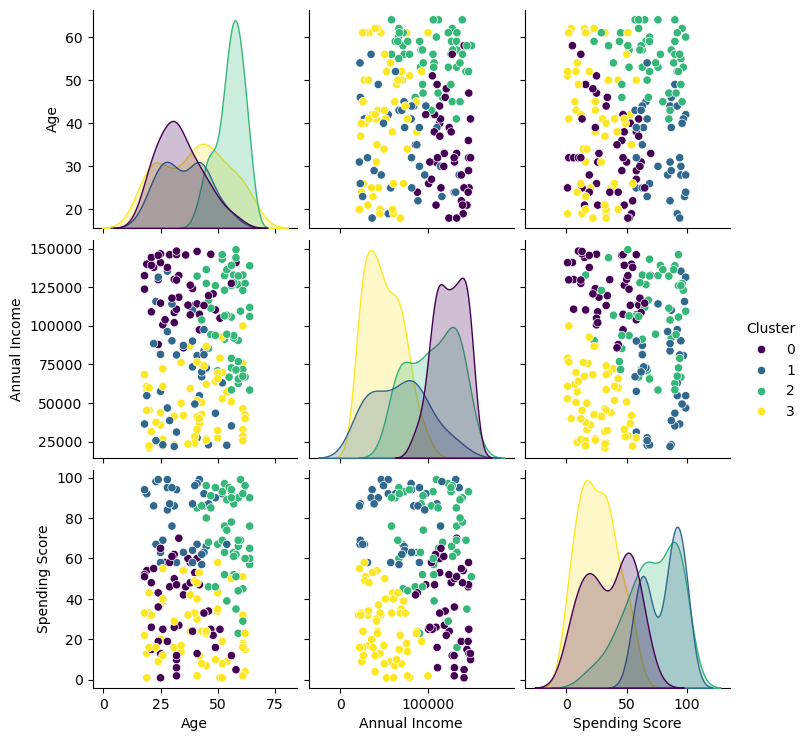

In [9]:
# Fit K-Means with the optimal number of clusters (let's assume k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [11]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.27065788519848355


Cluster Summary:
                Age  Annual Income  Spending Score
Cluster                                          
0        33.367347  124419.714286       35.367347
1        35.378378   67615.594595       80.621622
2        55.490566  105241.660377       70.924528
3        39.819672   49571.885246       25.737705


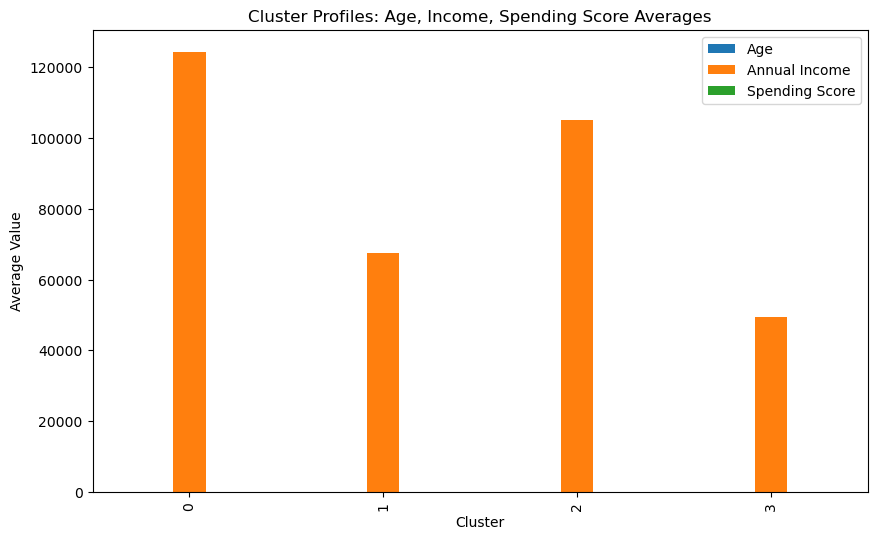

In [13]:
# Summary of clusters by calculating mean values for each feature
cluster_summary = df.groupby('Cluster').mean()

print("Cluster Summary:\n", cluster_summary)

# Visualize cluster summary with bar plots
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Age, Income, Spending Score Averages')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.show()


In [15]:
# Export the clustered data with cluster labels to a CSV file
df.to_csv('customer_segments.csv', index=False)
print("Data exported to 'customer_segments.csv'")


Data exported to 'customer_segments.csv'
